In [42]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
with open('data/full_data_corrected_2024.pkl', 'rb') as file:
    full_data = pickle.load(file)

print(type(full_data))

<class 'dict'>


In [44]:
# Choose an index to inspect (the first sample)
i = 0

# Print out all values for that sample
for key in full_data.keys():
    value = full_data[key][i]
    print(f"{key}: {value}")

I: [-0.018 -0.021 -0.018 ...  0.036  0.03   0.024]
II: [-0.042 -0.039 -0.036 ...  0.084  0.087  0.09 ]
III: [-0.021 -0.018 -0.018 ...  0.048  0.057  0.066]
AVR: [ 0.     0.     0.    ... -0.006 -0.012 -0.018]
AVL: [ 0.03   0.03   0.03  ... -0.063 -0.06  -0.06 ]
AVF: [-0.033 -0.03  -0.027 ...  0.066  0.072  0.078]
V1: [ 0.018  0.018  0.021 ... -0.048 -0.045 -0.042]
V2: [-0.06  -0.057 -0.054 ...  0.042  0.045  0.048]
V3: [-0.06  -0.06  -0.057 ...  0.057  0.06   0.057]
V4: [-0.093 -0.09  -0.087 ...  0.168  0.168  0.171]
V5: [-0.093 -0.09  -0.09  ...  0.159  0.156  0.159]
V6: [-0.075 -0.072 -0.072 ...  0.102  0.102  0.108]
Sex: Female
HTA: nan
Age: 61.0
PVC_transition: V1
SOO_chamber: Right ventricle
Height: nan
Weight: nan
BMI: nan
DM: nan
DLP: nan
Smoker: nan
COPD: nan
Sleep_apnea: nan
CLINICAL_SCORE: nan
SOO: Unión mitroaórtica
OTorigin: 0.0


This is a full ECG record, including:
* Raw 12-lead signals, each one a NumPy array
* Patient metadata: Sex, HTA, PVC_transition, SOO_chamber, Height, Weight, BMI, DM, DLP, Smoker, COPD, Sleep_apnea, CLINICAL_SCORE, SOO, OTorigin.

In [45]:
# Get the number of samples (same for all keys)
print(len(full_data['PVC_transition']))
# Convert to a dataframe for easier manipulation

metadata_keys = ['Sex', 'HTA', 'Age', 'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'BMI', 
                 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin']

df_meta = pd.DataFrame({key: full_data[key] for key in metadata_keys})
df_meta = df_meta.drop(columns=['CLINICAL_SCORE'])


df_meta.head(10)

181


,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,SOO,OTorigin
0,Female,NaN,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
1,Female,No,52.0,V3,RVOT,169.0,68.0,NaN,No,No,No,No,No,Pared libre anterior,1.0
2,Female,No,69.0,V3,LVOT,156.0,70.0,NaN,No,Yes,No,No,No,RCC,1.0
3,Female,No,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,M. papilar posteromedial,0.0
4,Female,Yes,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,RVOT septal,1.0
5,Male,No,84.0,V3,LVOT,179.0,97.0,30.273712,No,No,No,Yes,No,Seno de Valsalva izdo.,1.0
6,Male,Yes,74.0,V2,LVOT,167.0,89.0,31.912223,No,Yes,No,No,No,Intersenos dcho.-izdo.,1.0
7,Male,Yes,72.0,V2,LVOT,NaN,NaN,NaN,No,Yes,No,No,No,LVOT intersenos dcho.-izdo.,1.0
8,Female,Yes,62.0,V3,RVOT,152.0,62.0,26.835180,No,No,No,No,No,RVOT posterolateral,1.0
9,Female,No,36.0,V3,RVOT,159.0,80.0,NaN,No,No,No,No,No,RVOT,1.0


In [46]:
print(df_meta['SOO_chamber'].unique())

['Right ventricle' 'RVOT' 'LVOT' 'Coronary sinus' 'Tricuspid annulus'
 'Left ventricle' 'Mitral annulus']


In [47]:
# Build multi-lead ECG array
ecg_leads = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
n_samples = len(full_data['I'])
signal_length = len(full_data['I'][0])  # assuming all leads same length

multi_lead_ecgs = np.zeros((n_samples, len(ecg_leads), signal_length))
for i, lead in enumerate(ecg_leads):
    for j in range(n_samples):
        multi_lead_ecgs[j, i, :] = full_data[lead][j]

# Check the shape of the multi-lead ECG array
print(multi_lead_ecgs.shape)  # should be (n_samples, ecg_leads, signal_length)

(181, 12, 2500)


Hence, there are:
* 181 ECG samples
* 12 leads per sample
* 2500 time points per lead

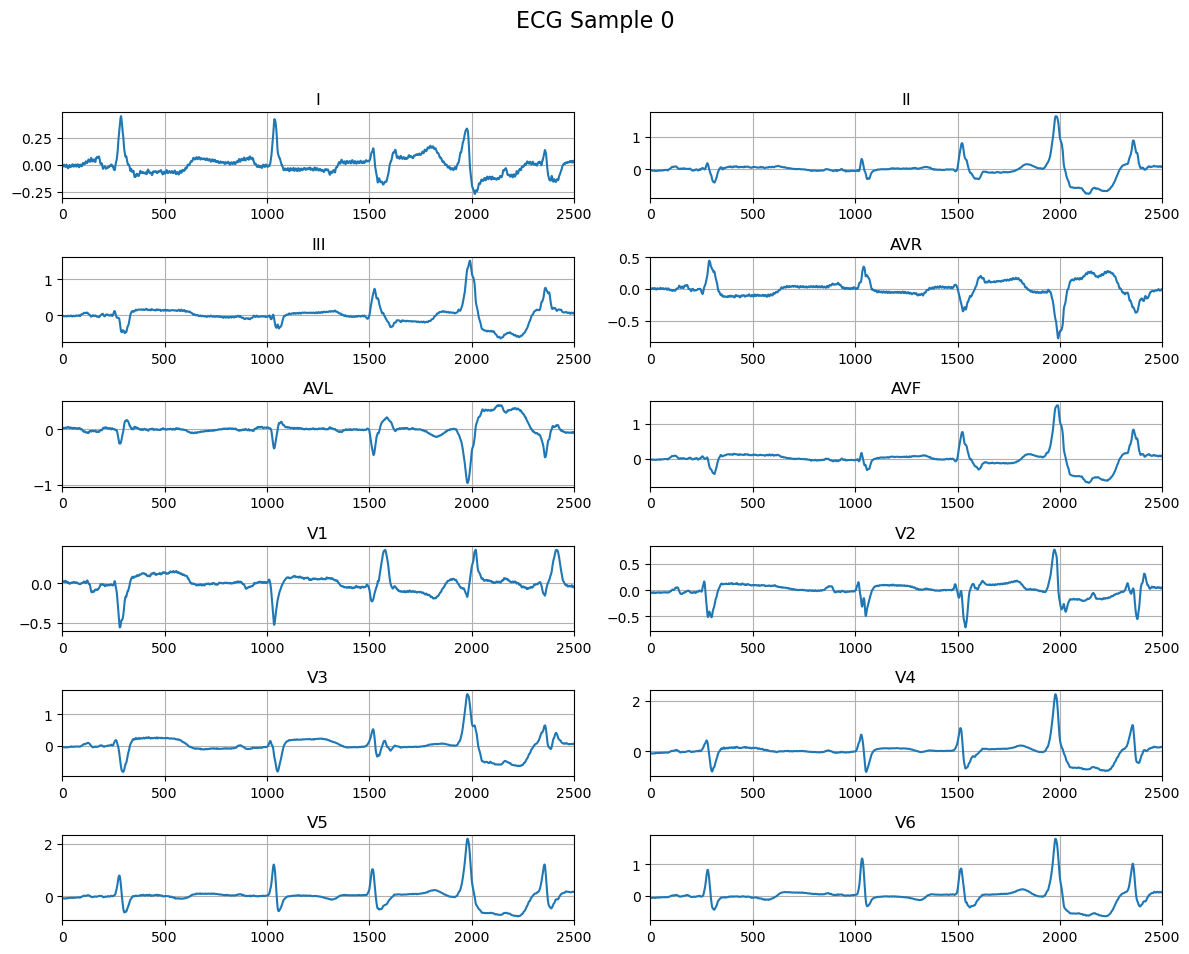

In [48]:
# Visualize the first ECG sample (12 leads)
sample_idx = 0
fig, axs = plt.subplots(6, 2, figsize=(12, 10))
fig.suptitle(f'ECG Sample {sample_idx}', fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.plot(multi_lead_ecgs[sample_idx, i])
    ax.set_title(ecg_leads[i])
    ax.set_xlim([0, signal_length])
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [49]:
import scipy.signal as sp
from scipy.interpolate import interp1d

# Processes one sample ECG with all 12 leads
def preprocess_ecg_signal(ecg_signals, fs=1000, target_fs=250, high=0.5, low=100.0):
    """
    Preprocess a multi-lead ECG signal [timepoints, leads]:
    - Resample to target_fs
    - Bandpass filter between `high` and `low`
    """
    timepoints = ecg_signals.shape[0] # Initially, 2500
    new_timepoints = int(timepoints * target_fs / fs) # 625
    
    # Resample each lead using interpolation
    ecg_resampled = np.zeros((new_timepoints, ecg_signals.shape[1]))
    for lead in range(ecg_signals.shape[1]):
        f = interp1d(np.arange(timepoints), ecg_signals[:, lead]) # Interpolation function from original points
        ecg_resampled[:, lead] = f(np.linspace(0, timepoints - 1, new_timepoints)) # Create the new timeline

    # Apply high-pass filter (remove slow drifts below 0.5 Hz)
    b_high, a_high = sp.butter(2, high / (target_fs / 2), btype='high')
    ecg_filtered = sp.filtfilt(b_high, a_high, ecg_resampled, axis=0)

    # Apply low-pass filter (remove noise above 100 Hz)
    b_low, a_low = sp.butter(2, low / (target_fs / 2), btype='low')
    ecg_filtered = sp.filtfilt(b_low, a_low, ecg_filtered, axis=0)

    return ecg_filtered # Return the signal with shape [625, 12]

In [50]:
def align_to_r_peak(ecg_filtered, fs=250):
    """
    Align ECG segment around R peak detected in the second second (samples 250–500).
    Returns a centered window of 1.25s (312 samples) around the R peak.
    """
    lead_for_r = 1  # Lead II is commonly used for R-peak detection
    signal = ecg_filtered[:, lead_for_r]
    
    # Focus on 1s to 2s segment
    window_start, window_end = int(1 * fs), int(2 * fs)
    segment = signal[window_start:window_end]
    
    # Find R peak in that window
    r_peak_relative = np.argmax(segment)
    r_peak_absolute = window_start + r_peak_relative

    # Center a 312-sample window on R peak
    half_window = 156
    start_idx = max(0, r_peak_absolute - half_window)
    end_idx = start_idx + 312

    # If window is beyond bounds, pad accordingly
    if end_idx > ecg_filtered.shape[0]:
        pad_len = end_idx - ecg_filtered.shape[0]
        padded = np.pad(ecg_filtered, ((0, pad_len), (0, 0)), mode='constant')
        segment_aligned = padded[start_idx:end_idx]
    else:
        segment_aligned = ecg_filtered[start_idx:end_idx]

    return segment_aligned

In [51]:
preprocessed_ecgs = []
for i in range(multi_lead_ecgs.shape[0]):
    signal_raw = multi_lead_ecgs[i].T  # shape becomes [2500, 12]
    processed = preprocess_ecg_signal(signal_raw)  # shape [625, 12]
    aligned = align_to_r_peak(processed)  # shape [312, 12]
    preprocessed_ecgs.append(aligned)

preprocessed_ecgs = np.stack(preprocessed_ecgs)  # shape [n_samples, 312, 12]
print("All signals aligned to R peak. Final shape:", preprocessed_ecgs.shape)

All signals aligned to R peak. Final shape: (181, 312, 12)


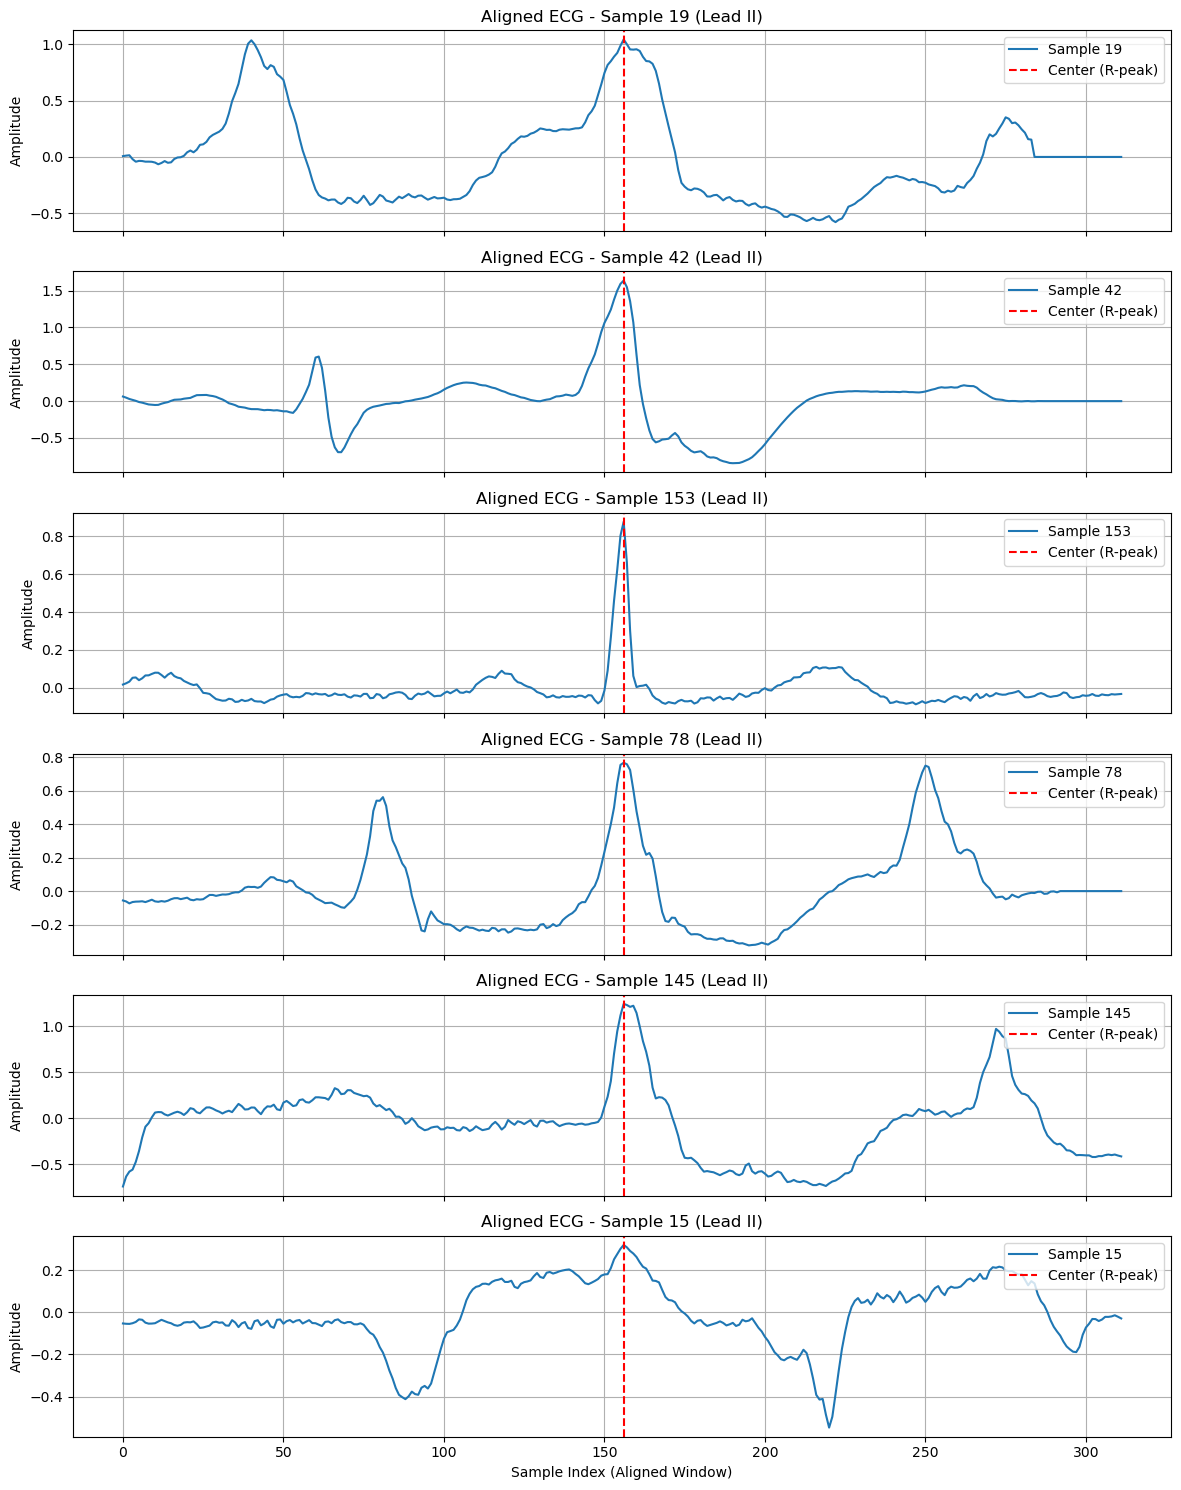

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples to plot
n_samples_to_plot = 6
lead_index = 1  # Lead II
lead_name = 'II'

# Randomly select sample indices
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(preprocessed_ecgs.shape[0], n_samples_to_plot, replace=False)

# Create subplots
fig, axs = plt.subplots(n_samples_to_plot, 1, figsize=(12, 2.5 * n_samples_to_plot), sharex=True)

for i, idx in enumerate(sample_indices):
    axs[i].plot(preprocessed_ecgs[idx, :, lead_index], label=f'Sample {idx}')
    axs[i].axvline(x=156, color='r', linestyle='--', label='Center (R-peak)')
    axs[i].set_ylabel("Amplitude")
    axs[i].grid(True)
    axs[i].legend(loc='upper right')
    axs[i].set_title(f"Aligned ECG - Sample {idx} (Lead {lead_name})")

axs[-1].set_xlabel("Sample Index (Aligned Window)")
plt.tight_layout()
plt.show()

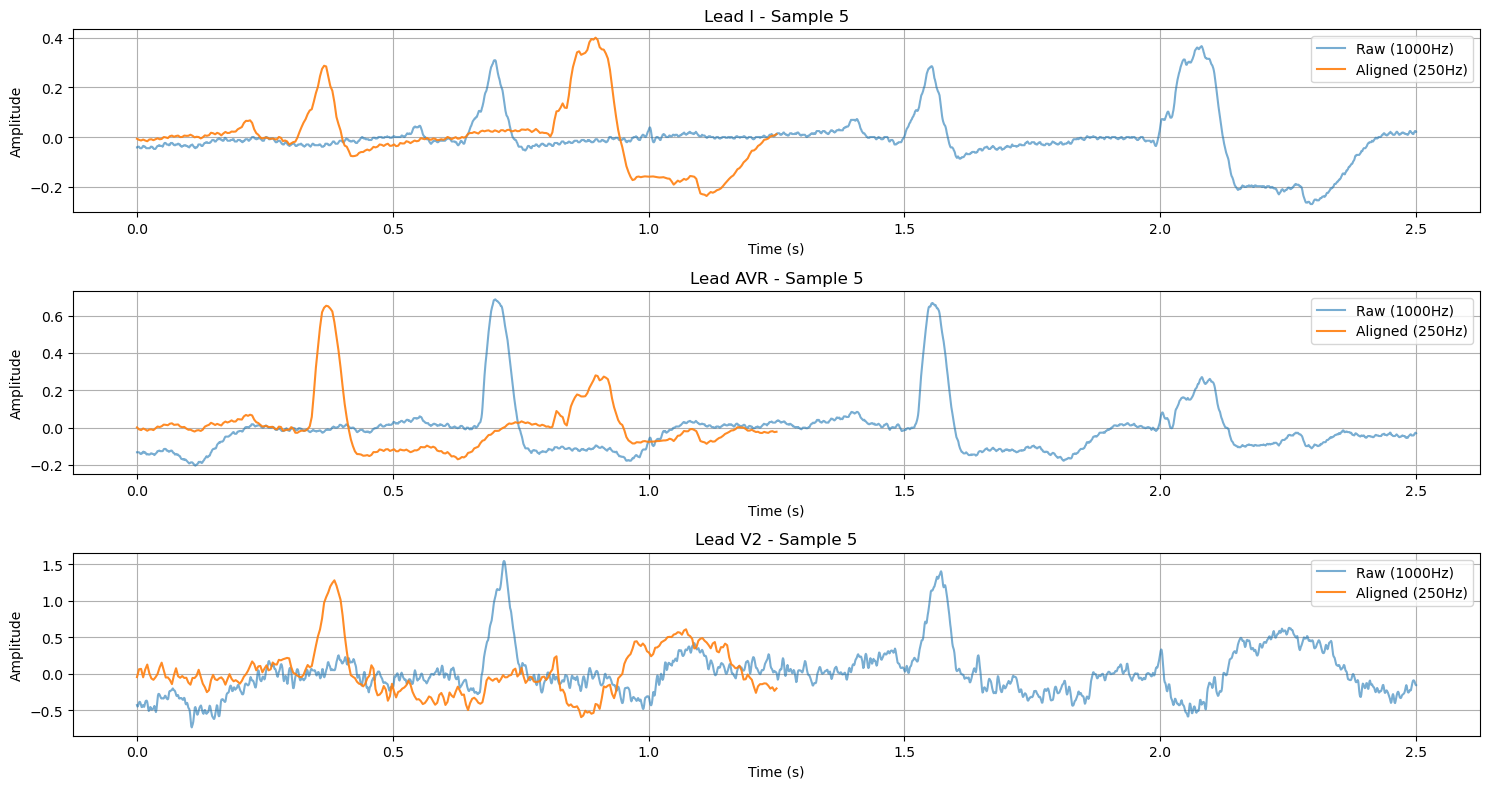

In [53]:
# Compare the raw signal vs. aligned signal for a given sample
sample_idx = i  # make sure 'i' is defined or choose another valid sample index

leads_to_plot = ['I', 'AVR', 'V2']
lead_indices = [ecg_leads.index(lead) for lead in leads_to_plot]

# Raw signal: shape [12, 2500]
raw_signal = multi_lead_ecgs[sample_idx]

# Aligned signal (after preprocessing and R-peak alignment): shape [312, 12]
aligned_signal = preprocessed_ecgs[sample_idx].T  # shape [12, 312]

# Time axes
t_raw = np.linspace(0, 2.5, raw_signal.shape[1])              # 2500 samples at 1000 Hz
t_aligned = np.linspace(0, 1.25, aligned_signal.shape[1])     # 312 samples at 250 Hz

plt.figure(figsize=(15, 8))

for k, lead_idx in enumerate(lead_indices):
    plt.subplot(len(lead_indices), 1, k+1)
    
    plt.plot(t_raw, raw_signal[lead_idx], label='Raw (1000Hz)', alpha=0.6)
    plt.plot(t_aligned, aligned_signal[lead_idx], label='Aligned (250Hz)', alpha=0.9)
    
    plt.title(f"Lead {ecg_leads[lead_idx]} - Sample {sample_idx}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
# Map SOO to chamber (Left / Right /OTHER)
# Load Hoja1 and Hoja2 from the mapping Excel file
labels_path = "data/labels_FontiersUnsupervised.xlsx"
map_hoja1 = pd.read_excel(labels_path, sheet_name="Hoja1")
map_hoja2 = pd.read_excel(labels_path, sheet_name="Hoja2")

# Build lookup dictionaries
map_1 = dict(zip(map_hoja1["SOO"], map_hoja1["SOO_Chamber"]))
map_2 = dict(zip(map_hoja2["SOO"], map_hoja2["SOO_chamber"]))

# Step 1: Initial mapping using Hoja1
simplified_chambers = []
for entry in full_data["SOO"]:
    if isinstance(entry, str) and entry in map_1:
        simplified_chambers.append(map_1[entry])
    else:
        simplified_chambers.append("OTHER")

# Step 2: Update entries marked as "OTHER" using Hoja2
for i, entry in enumerate(full_data["SOO"]):
    if simplified_chambers[i] == "OTHER" and isinstance(entry, str) and entry in map_2:
        simplified_chambers[i] = map_2[entry]

In [55]:
# Show all unique chamber names after Hoja1 + Hoja2 mapping
unique_chambers = sorted(set(simplified_chambers))
print("Unique chamber labels found:", len(unique_chambers))
for label in unique_chambers:
    print("-", label)

Unique chamber labels found: 8
- Coronary sinus
- LVOT
- Left ventricle
- Mitral annulus
- OTHER
- RVOT
- Right ventricle
- Tricuspid annulus


In [56]:
def normalize_chamber(label):
    """
    Normalize known chamber labels to: 'Left', 'Right', or 'OTHER'
    """
    if label in ["RVOT", "Right ventricle", "Tricuspid annulus", "Coronary sinus"]:
        return "Right"
    elif label in ["LVOT", "Left ventricle", "Mitral annulus"]:
        return "Left"
    return "OTHER"

final_chambers_normalized = [normalize_chamber(c) for c in simplified_chambers]

In [57]:
# Include the final label (Left, Right, OTHER) as a column in our metadata DataFrame
df_meta["normalized_label"] = final_chambers_normalized
print(df_meta.info())

df_clean = df_meta[df_meta["normalized_label"].isin(["Left", "Right"])].copy()
df_clean.info()
print(df_clean["normalized_label"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               179 non-null    object 
 1   HTA               175 non-null    object 
 2   Age               178 non-null    float64
 3   PVC_transition    176 non-null    object 
 4   SOO_chamber       181 non-null    object 
 5   Height            153 non-null    float64
 6   Weight            153 non-null    float64
 7   BMI               99 non-null     float64
 8   DM                174 non-null    object 
 9   DLP               175 non-null    object 
 10  Smoker            173 non-null    object 
 11  COPD              174 non-null    object 
 12  Sleep_apnea       173 non-null    object 
 13  SOO               180 non-null    object 
 14  OTorigin          180 non-null    float64
 15  normalized_label  181 non-null    object 
dtypes: float64(5), object(11)
memory usage: 22.8

There are many missing values in different columns, so we must decide how to handle them. Since no columns have more than 40% missing values, we decided to impute them.

In [58]:
# Impute numerical columns (median)
numeric_columns = ["Age", "Height", "Weight", "BMI"]
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())

# Impute categorical columns (mode)
categorical_columns = ["Sex", "PVC_transition", "HTA", "DM", "DLP", "Smoker", "COPD", "Sleep_apnea", "OTorigin"]
df_clean[categorical_columns] = df_clean[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Map labels to numeric values
df_clean["label"] = df_clean["normalized_label"].map({"Left": 0, "Right": 1})

In [59]:
print(df_clean.info())
df_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 180
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               180 non-null    object 
 1   HTA               180 non-null    object 
 2   Age               180 non-null    float64
 3   PVC_transition    180 non-null    object 
 4   SOO_chamber       180 non-null    object 
 5   Height            180 non-null    float64
 6   Weight            180 non-null    float64
 7   BMI               180 non-null    float64
 8   DM                180 non-null    object 
 9   DLP               180 non-null    object 
 10  Smoker            180 non-null    object 
 11  COPD              180 non-null    object 
 12  Sleep_apnea       180 non-null    object 
 13  SOO               180 non-null    object 
 14  OTorigin          180 non-null    float64
 15  normalized_label  180 non-null    object 
 16  label             180 non-null    int64  
dtypes:

,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,SOO,OTorigin,normalized_label,label
0,Female,No,61.0,V1,Right ventricle,169.5,75.5,26.562500,No,No,No,No,No,Unión mitroaórtica,0.0,Right,1
1,Female,No,52.0,V3,RVOT,169.0,68.0,26.562500,No,No,No,No,No,Pared libre anterior,1.0,Right,1
2,Female,No,69.0,V3,LVOT,156.0,70.0,26.562500,No,Yes,No,No,No,RCC,1.0,Left,0
3,Female,No,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,M. papilar posteromedial,0.0,Right,1
4,Female,Yes,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,RVOT septal,1.0,Right,1
5,Male,No,84.0,V3,LVOT,179.0,97.0,30.273712,No,No,No,Yes,No,Seno de Valsalva izdo.,1.0,Left,0
6,Male,Yes,74.0,V2,LVOT,167.0,89.0,31.912223,No,Yes,No,No,No,Intersenos dcho.-izdo.,1.0,Left,0
7,Male,Yes,72.0,V2,LVOT,169.5,75.5,26.562500,No,Yes,No,No,No,LVOT intersenos dcho.-izdo.,1.0,Left,0
8,Female,Yes,62.0,V3,RVOT,152.0,62.0,26.835180,No,No,No,No,No,RVOT posterolateral,1.0,Right,1
9,Female,No,36.0,V3,RVOT,159.0,80.0,26.562500,No,No,No,No,No,RVOT,1.0,Right,1


In [60]:
# Extract valid indices
valid_indices = df_clean.index.tolist()
labels = df_clean["label"].values

# Align ECG signals with df_clean
X = [preprocessed_ecgs[i] for i in valid_indices]
y = labels

In [61]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, valid_indices, stratify=y, test_size=0.2, random_state=42)

# Convert X_train and X_test to NumPy arrays
X_train = np.stack(X_train)
X_test = np.stack(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Check results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (144, 312, 12)
X_test shape: (36, 312, 12)
y_train shape: (144,)
y_test shape: (36,)


Training Set:
  Left (0): 32
  Right (1): 112

Test Set:
  Left (0): 8
  Right (1): 28


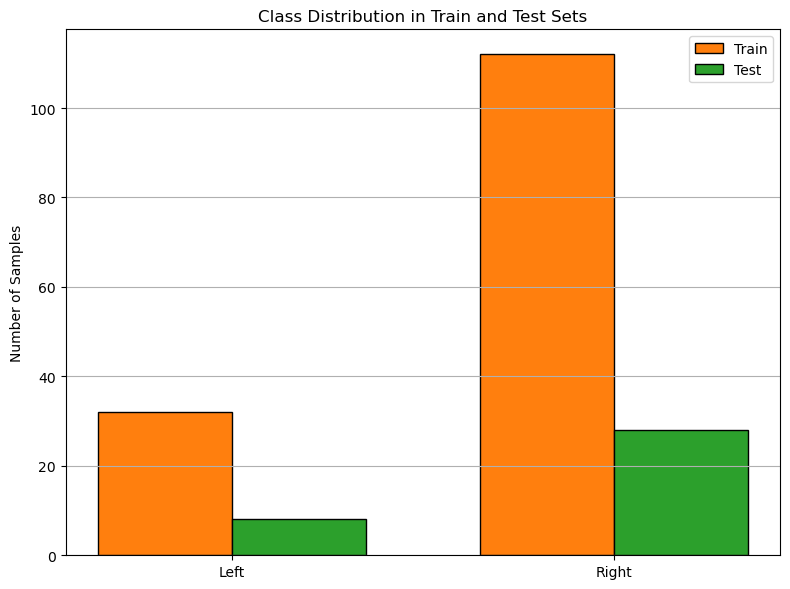

In [62]:
# Count Left and Right labels in train and test sets
left_train = np.sum(y_train == 0)
right_train = np.sum(y_train == 1)
left_test = np.sum(y_test == 0)
right_test = np.sum(y_test == 1)

# Print counts
print("Training Set:")
print("  Left (0):", left_train)
print("  Right (1):", right_train)

print("\nTest Set:")
print("  Left (0):", left_test)
print("  Right (1):", right_test)

# Plot side-by-side bar chart
labels = ["Left", "Right"]
train_counts = [left_train, right_train]
test_counts = [left_test, right_test]

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_counts, width, label='Train', color='tab:orange', edgecolor='black')
plt.bar(x + width/2, test_counts, width, label='Test', color='tab:green', edgecolor='black')

plt.ylabel('Number of Samples')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [63]:
import torch 

# Load pretrained SAK models
model_dir = "data/modelos"
models = [torch.load(f"{model_dir}/model.{i+1}") for i in range(5)]

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [64]:
import numpy as np
import torch
import skimage.util
import math
from typing import List

def predict_ecg(
    ecg: np.ndarray,
    fs: int = 250,
    model: List[torch.nn.Module] = None,
    window_size: int = 2048,
    stride: int = 256,
    threshold_ensemble: float = 0.5,
    thr_dice: float = 0.9,
    ptg_voting: float = 0.5,
    batch_size: int = 16
) -> np.ndarray:
    """
    Predicts P, QRS, and T masks for a given ECG signal using an ensemble of models.

    Args:
        ecg (np.ndarray): ECG signal of shape (T, L) where T is time, L is leads.
        fs (int): Sampling frequency (default 250).
        model (list): List of PyTorch models (each predicting sigmoid mask for 3 classes).
        window_size (int): Window size in samples for model input.
        stride (int): Stride between windows.
        threshold_ensemble (float): Threshold proportion of models that must agree on a point.
        thr_dice (float): Threshold for each model’s probability output to count as a “positive”.
        ptg_voting (float): Final voting threshold on normalized votes per timepoint.
        batch_size (int): Batch size for model prediction.

    Returns:
        full_mask (np.ndarray): Binary mask of shape (3, T) for P, QRS, and T waves.
    """
    if ecg.shape[0] < 50:
        raise ValueError(f"Signal too short for segmentation: {ecg.shape}")

    ecg = np.copy(ecg)
    if ecg.ndim == 2 and ecg.shape[0] < ecg.shape[1]:
        ecg = ecg.T
    ecg = ecg[:, :12]

    N = ecg.shape[0]

    # Pad to multiple of window size
    if N < window_size:
        pad = math.ceil(N / window_size) * window_size - N
        ecg = np.pad(ecg, ((0, pad), (0, 0)), mode='edge')
    
    remainder = (ecg.shape[0] - window_size) % stride
    if remainder != 0:
        pad = stride - remainder
        ecg = np.pad(ecg, ((0, pad), (0, 0)), mode='edge')

    # Windowing
    windowed = skimage.util.view_as_windows(ecg, (window_size, ecg.shape[1]), step=(stride, 1))
    windowed = windowed[:, 0, :, :]  # (n_windows, 2048, 12)
    windowed = np.swapaxes(windowed, 1, 2)  # (n_windows, 12, 2048)

    # Model expects 1 channel per lead per window, so let's adjust the shape
    windowed = windowed.reshape(-1, 1, window_size)  # (n_windows * 12, 1, 2048)

    # Prediction
    mask = np.zeros((windowed.shape[0], 3, window_size), dtype=float)
    device = "cuda" if torch.cuda.is_available() else "cpu"

    if model is None or len(model) == 0:
        raise ValueError("No models provided for prediction.")

    # Set models to evaluation mode
    for m in model:
        m.eval()

    with torch.no_grad():
        for m in model:
            m = m.to(device)
            for i in range(0, windowed.shape[0], batch_size):
                inputs = {"x": torch.tensor(windowed[i:i+batch_size]).float().to(device)}
                output = m(inputs)
                
                # Handle model outputs based on expected type
                if isinstance(output, dict):
                    outputs = output["sigmoid"].cpu().numpy()
                else:
                    outputs = torch.sigmoid(output).cpu().numpy()
                
                mask[i:i+batch_size] += outputs > thr_dice

        # Threshold based on ensemble agreement
        mask = mask >= len(model) * threshold_ensemble

    # Reconstruct full mask
    full_len = (mask.shape[0] - 1) * stride + window_size
    full_mask = np.zeros((3, full_len))
    counter = np.zeros(full_len)

    for i in range(mask.shape[0]):
        start = i * stride
        full_mask[:, start:start+window_size] += mask[i]
        counter[start:start+window_size] += 1

    # Avoid division by zero
    counter[counter == 0] = 1
    full_mask = (full_mask / counter) > ptg_voting

    # Truncate to original length
    full_mask = full_mask[:, :N]

    return full_mask

In [65]:
def extract_morph_features(
    signal: np.ndarray,
    mask: np.ndarray,
    fs: int = 250
) -> dict:
    """
    Extracts R/S amplitude, ratio, QRS duration, and T polarity from a single lead.

    Args:
        signal (np.ndarray): ECG signal for one lead (T,) or (T, 1).
        mask (np.ndarray): Binary segmentation mask of shape (3, T).
        fs (int): Sampling frequency in Hz.

    Returns:
        dict: Extracted features.
    """
    features = {}
    if signal.ndim == 2:
        signal = signal[:, 0]
    if signal.shape[0] < 10 or mask.shape != (3, signal.shape[0]):
        raise ValueError("Malformed signal or mask")

    r_peak = np.max(signal)
    s_trough = np.min(signal)
    r_s_ratio = r_peak / abs(s_trough) if s_trough != 0 else 0

    qrs_indices = np.where(mask[1])[0]
    qrs_dur = (qrs_indices[-1] - qrs_indices[0]) / fs * 1000 if len(qrs_indices) > 1 else 0

    t_indices = np.where(mask[2])[0]
    if len(t_indices) > 3:
        t_mean = np.mean(signal[t_indices])
        polarity = 1 if t_mean > 0.02 else (-1 if t_mean < -0.02 else 0)
    else:
        polarity = 0

    features["r_amp"] = r_peak
    features["s_amp"] = s_trough
    features["r_s_ratio"] = r_s_ratio
    features["qrs_dur"] = qrs_dur
    features["t_polarity"] = polarity

    return features

In [66]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
from typing import List

def extract_all_features(
    X_data: np.ndarray,
    y_data: np.ndarray,  # Patient ID or unique identifier
    models: List[torch.nn.Module],
    fs: int = 250
) -> pd.DataFrame:
    """
    Extract morphological features for all ECGs and all leads.

    Args:
        X_data (np.ndarray): ECGs of shape (N, T, L)
        y_data (np.ndarray): Patient IDs or another identifier (aligned with X_data)
        models (List[torch.nn.Module]): Ensemble of PyTorch models
        fs (int): Sampling frequency

    Returns:
        pd.DataFrame: Feature dataframe with one row per ECG, including patient_id
    """
    feature_rows = []

    for i in tqdm(range(len(X_data)), desc="Extracting features"):
        ecg = X_data[i]
        patient_id = y_data[i]  # This corresponds to the patient ID or unique identifier

        try:
            # Predict mask or segmentation for the ECG (assuming you have a `predict_ecg` function)
            mask = predict_ecg(ecg, fs=fs, model=models)

            row = {"patient_id": patient_id}  # Start row with the patient ID

            for lead_idx in range(ecg.shape[1]):
                lead_signal = ecg[:, lead_idx]
                lead_mask = mask.copy()

                try:
                    features = extract_morph_features(lead_signal, lead_mask, fs=fs)
                    # Extract features for the current lead and add them to the row
                    for key, val in features.items():
                        row[f"lead{lead_idx+1}_{key}"] = val
                except Exception as e:
                    print(f"Feature extraction failed on sample {i}, lead {lead_idx}: {e}")
                    # If feature extraction fails, fill with NaN
                    for key in ["r_amp", "s_amp", "r_s_ratio", "qrs_dur", "t_polarity"]:
                        row[f"lead{lead_idx+1}_{key}"] = np.nan

            feature_rows.append(row)

        except Exception as e:
            print(f"Segmentation failed on sample {i}: {e}")
            continue

    # Convert the list of rows into a DataFrame
    feature_df = pd.DataFrame(feature_rows)

    return feature_df

In [67]:
# Extract features for the training set
df_train_features = extract_all_features(X_train, train_idx, models)

# Extract features for the test set
df_test_features = extract_all_features(X_test, test_idx, models)

Extracting features: 100%|██████████| 36/36 [00:31<00:00,  1.13it/s]


In [68]:
df_train_features.head()

,patient_id,lead1_r_amp,lead1_s_amp,lead1_r_s_ratio,lead1_qrs_dur,lead1_t_polarity,lead2_r_amp,lead2_s_amp,lead2_r_s_ratio,lead2_qrs_dur,...,lead11_r_amp,lead11_s_amp,lead11_r_s_ratio,lead11_qrs_dur,lead11_t_polarity,lead12_r_amp,lead12_s_amp,lead12_r_s_ratio,lead12_qrs_dur,lead12_t_polarity
0,171,0.253785,-0.636806,0.398529,620.0,1,1.095881,-0.445074,2.462247,620.0,...,2.199289,-0.496466,4.429884,620.0,-1,1.637266,-0.388466,4.214692,620.0,-1
1,75,0.233716,-0.215443,1.084817,668.0,0,1.874122,-1.037094,1.807090,668.0,...,1.718320,-0.991114,1.733726,668.0,-1,1.724547,-1.051414,1.640217,668.0,-1
2,157,0.889636,-0.428391,2.076689,712.0,1,1.734226,-0.410631,4.223322,712.0,...,2.216481,-0.575827,3.849214,712.0,-1,1.754062,-0.473768,3.702366,712.0,0
3,108,0.313705,-0.128841,2.434816,572.0,-1,0.900515,-0.669934,1.344185,572.0,...,0.807806,-0.437913,1.844673,572.0,-1,0.793869,-0.473017,1.678308,572.0,-1
4,112,0.450494,-0.558987,0.805911,608.0,1,1.447764,-0.773546,1.871595,608.0,...,0.957883,-0.496936,1.927575,608.0,-1,1.022520,-0.495625,2.063093,608.0,-1


In [69]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         144 non-null    int64  
 1   lead1_r_amp        144 non-null    float64
 2   lead1_s_amp        144 non-null    float64
 3   lead1_r_s_ratio    144 non-null    float64
 4   lead1_qrs_dur      144 non-null    float64
 5   lead1_t_polarity   144 non-null    int64  
 6   lead2_r_amp        144 non-null    float64
 7   lead2_s_amp        144 non-null    float64
 8   lead2_r_s_ratio    144 non-null    float64
 9   lead2_qrs_dur      144 non-null    float64
 10  lead2_t_polarity   144 non-null    int64  
 11  lead3_r_amp        144 non-null    float64
 12  lead3_s_amp        144 non-null    float64
 13  lead3_r_s_ratio    144 non-null    float64
 14  lead3_qrs_dur      144 non-null    float64
 15  lead3_t_polarity   144 non-null    int64  
 16  lead4_r_amp        144 non

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 180
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               180 non-null    object 
 1   HTA               180 non-null    object 
 2   Age               180 non-null    float64
 3   PVC_transition    180 non-null    object 
 4   SOO_chamber       180 non-null    object 
 5   Height            180 non-null    float64
 6   Weight            180 non-null    float64
 7   BMI               180 non-null    float64
 8   DM                180 non-null    object 
 9   DLP               180 non-null    object 
 10  Smoker            180 non-null    object 
 11  COPD              180 non-null    object 
 12  Sleep_apnea       180 non-null    object 
 13  SOO               180 non-null    object 
 14  OTorigin          180 non-null    float64
 15  normalized_label  180 non-null    object 
 16  label             180 non-null    int64  
dtypes:

In [71]:
df_clean['patient_id'] = df_clean.index

In [72]:
df_clean.head()

,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,SOO,OTorigin,normalized_label,label,patient_id
0,Female,No,61.0,V1,Right ventricle,169.5,75.5,26.562500,No,No,No,No,No,Unión mitroaórtica,0.0,Right,1,0
1,Female,No,52.0,V3,RVOT,169.0,68.0,26.562500,No,No,No,No,No,Pared libre anterior,1.0,Right,1,1
2,Female,No,69.0,V3,LVOT,156.0,70.0,26.562500,No,Yes,No,No,No,RCC,1.0,Left,0,2
3,Female,No,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,M. papilar posteromedial,0.0,Right,1,3
4,Female,Yes,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,RVOT septal,1.0,Right,1,4


In [73]:
!pip install seaborn

In [74]:
!pip install shap

In [75]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
# Merge df_train_features with df_clean on 'patient_id'
df_train_merged = pd.merge(df_train_features, df_clean, on='patient_id', how='left')

# Exclude 'SOO' and 'normalized_label' from the categorical columns list for encoding
categorical_cols = ['Sex', 'HTA', 'PVC_transition', 'SOO_chamber', 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea']

# Encode categorical columns using one-hot encoding
df_train_merged = pd.get_dummies(df_train_merged, columns=categorical_cols, drop_first=True)

# Now df_train_merged contains both features and demographic data, ready for model training
# Separate features and labels
X_train_merged = df_train_merged.drop(columns=['patient_id', 'label', 'SOO', 'normalized_label'])
y_train_merged = df_train_merged['label']

In [77]:
X_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lead1_r_amp                    144 non-null    float64
 1   lead1_s_amp                    144 non-null    float64
 2   lead1_r_s_ratio                144 non-null    float64
 3   lead1_qrs_dur                  144 non-null    float64
 4   lead1_t_polarity               144 non-null    int64  
 5   lead2_r_amp                    144 non-null    float64
 6   lead2_s_amp                    144 non-null    float64
 7   lead2_r_s_ratio                144 non-null    float64
 8   lead2_qrs_dur                  144 non-null    float64
 9   lead2_t_polarity               144 non-null    int64  
 10  lead3_r_amp                    144 non-null    float64
 11  lead3_s_amp                    144 non-null    float64
 12  lead3_r_s_ratio                144 non-null    flo

In [78]:
# Do the same for the test set
df_test_merged = pd.merge(df_test_features, df_clean, on='patient_id', how='left')

# Encode categorical columns using one-hot encoding for the test set
df_test_merged = pd.get_dummies(df_test_merged, columns=categorical_cols, drop_first=True)

# Now df_test_merged contains both features and demographic data, ready for model training
# Separate features for the test set
X_test_merged = df_test_merged.drop(columns=['patient_id', 'label', 'SOO', 'normalized_label'])

# Get the true labels for the test set directly from df_clean, based on patient_id
y_test = df_clean.loc[df_clean['patient_id'].isin(df_test_merged['patient_id']), 'label']

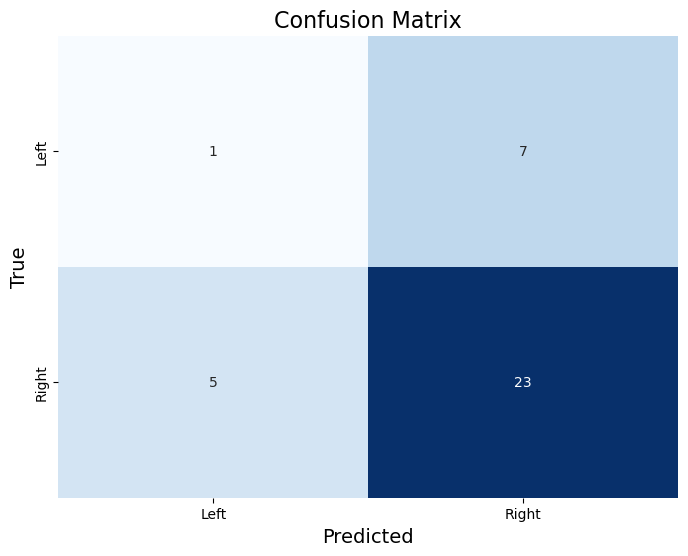

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.12      0.14         8
           1       0.77      0.82      0.79        28

    accuracy                           0.67        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.63      0.67      0.65        36



In [79]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_merged, y_train_merged)

# Make predictions
y_pred = rf_model.predict(X_test_merged)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Left', 'Right'], yticklabels=['Left', 'Right'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the hyperparameter grid to search through (without 'max_features')
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_merged, y_train_merged)

# Get the best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test_merged)

# Evaluate performance of the best model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 